<a href="https://colab.research.google.com/github/cristina-ramos/INFO/blob/main/Assignments/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [3]:
pop_restaurants = Table.read_table('/content/restaurant_inspection_scores.csv').drop(5,6)
pop_restaurants

Restaurant Name,Zip Code,Inspection Date,Score,Address
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652"
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"


In [5]:
pop_mean = np.mean(pop_restaurants.column(3))
pop_mean

91.40706693478886

In [6]:
restaurant_sample = pop_restaurants.sample(100, with_replacement=False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address
China Kitchen,78723,01/05/2016,85,"7112 ED BLUESTEIN BLVD SB Unit 180 AUSTIN, TX 78723 (30. ..."
Estancia Churrascaria,78759,10/13/2016,91,"10000 RESEARCH BLVD SB Unit B AUSTIN, TX 78759 (30.39235 ..."
Taco Cabana,78660,04/22/2015,82,"15002 FM 1825 RD AUSTIN, TX 78660 (30.442347, -97.665685)"
Corner Store #2103,78753,02/09/2015,93,"11139 N IH 35 SVRD NB AUSTIN, TX 78753 (30.376525, -97.6 ..."
Arby's Roast Beef #07400,78753,08/06/2014,100,"13609 N IH 35 SVRD NB AUSTIN, TX 78753 (30.422931, -97.6 ..."
Red Mango,78705,10/05/2015,94,"2222 RIO GRANDE ST Bunit 120 AUSTIN, TX 78705 (30.286839 ..."
Tropical Smoothie Cafe,78702,03/24/2015,84,"3401 WEBBERVILLE RD AUSTIN, TX 78702 (30.268401, -97.707223)"
LW - Chicken Express,78734,03/28/2016,97,"2109 S FM 620 RD LAKEWAY, TX 78734 (30.342745, -97.967301)"
Domino's Pizza,78748,01/28/2014,86,"1807 W SLAUGHTER LN Unit 465 AUSTIN, TX 78748 (30.173689 ..."
Buca di Beppo,78759,06/01/2015,82,"3600 TUDOR BLVD AUSTIN, TX 78759 (30.384089, -97.736918)"


In [8]:
sample_mean = np.mean(restaurant_sample.column(3))
sample_mean

92.64

In [9]:
def one_resampled_mean(data):
  resampled_data = pop_restaurants.sample(100)
  resampled_data = pop_restaurants.column('Score').mean()
  return resampled_data

one_resampled_mean(pop_restaurants)

91.40706693478886

In [10]:
def bootstrap_scores():
  resampled_means = make_array()
  for i in range(5000):
    resampled_mean = np.mean(restaurant_sample.sample().column(3))
    resampled_means = np.append(resampled_means, resampled_mean)
  return resampled_means

resampled_means = bootstrap_scores()
resampled_means

array([92.08, 93.69, 93.12, ..., 92.84, 92.68, 93.34])

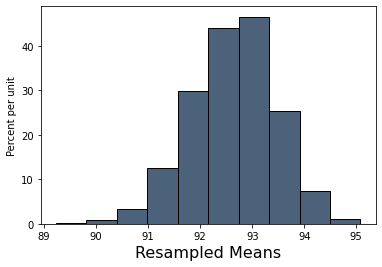

In [11]:
Table().with_column('Resampled Means', resampled_means).hist()

In [ ]:
lower_bound = percentile(2.5, resampled_means)
upper_bound = percentile(97.5, resampled_means)
print("95% confidence interval for the average restaurant score, computed by bootstrapping:")
print(lower_bound, upper_bound)

95% confidence interval for the average restaurant score, computed by bootstrapping:
89.44 92.6


In [ ]:
sample_sd = np.std(restaurant_sample.column(3))
sample_size = restaurant_sample.num_rows
mean_sd = sample_sd / sample_size**0.5
lower_bound_normal = sample_mean - 2 * mean_sd
upper_bound_normal = sample_mean + 2 * mean_sd
print("95% confidence interval for the average restaurant score, computed by a normal approximation:")
print(lower_bound_normal, upper_bound_normal)

95% confidence interval for the average restaurant score, computed by a normal approximation:
89.38064739973528 92.67935260026472


In [ ]:
def one_statistic_prop_heads(n):
  coin_proportions = make_array(.5, .5)
  simulated_proportions = sample_proportions(n, coin_proportions)
  prop_heads = simulated_proportions.item(0)
  return prop_heads

one_statistic_prop_heads(10)

0.4

In [ ]:
def sample_size_n(n):
  coin_proportions = make_array(.5, .5)
  heads_proportions = make_array()
  for i in np.arange(5000):
    simulated_proportions = sample_proportions(n, coin_proportions)
    props_head = simulated_proportions.item(0)
    heads_proportions = np.append(heads_proportions, props_head)
  return heads_proportions

sample_size_n(5)

array([0.2, 0.6, 0.2, ..., 0.4, 0.4, 0.4])

In [ ]:
united = Table.read_table('/content/united_summer2015.csv')
united_std = np.std(united.column('Delay'))
united_std

39.480199851609314

In [ ]:
def empirical_sample_mean_sd(n):
  sample_means = make_array()
  for i in np.arange(500):
    sample = united.sample(n).column('Delay')
    sample_mean = np.mean(sample)
    sample_means = np.append(sample_means, sample_mean)
  return np.std(sample_means)

empirical_sample_mean_sd(10)

13.402533408277705

In [ ]:
def predict_sample_mean_sd(n):
  return united_std / (n)**.5

predict_sample_mean_sd(10)

12.484735400972708